# U.S. Medical Insurance Costs

Welcome to my U.S. Medical Insurance Costs project! I will be using Python (and pandas) to analyze a CSV file containing patient information and medical insurance costs in the U.S.

After scoping the data, I have prepared four key questions. Therefore, I have divided this project into four sections, each of which aims to answer its corresponding question.

# Questions

1. On average, how much more do smokers pay for insurance than non-smokers - overall and by region?
2. On average, how much do charges increase for every additional child?
3. On average, which sex pays more - overall and by age group? By how much?
4. What is the most influential factor in insurance costs?

# Part One: Smokers and Non-smokers by Region

Part one of this project will analyze insurance cost by smoker status and region.

To begin, I will import the pandas library and read the CSV file into a DataFrame. I will then print the columns of the DataFrame and explain what they represent.

In [2]:
import pandas as pd # Import the pandas library so I can create and manipulate DataFrames using the CSV file

df = pd.read_csv("insurance.csv") # Load the CSV file into the variable df
print(df.columns) # Print the columns of df

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


The "age" column represents a patient's age.

The "sex" column represents a patient's sex.

The "bmi" column represents a patient's BMI.

The "children" column represents the number of children a patient has.

The "smoker" column represents whether or not a patient smokes.

The "region" column represents which region a patient resides in.

The "charges" column represents how much patients are charged for insurance.

Now, I will determine which regions the dataset represents by using the .groupby() and .describe() methods.

In [3]:
df_by_region = df.groupby("region") # Group the dataset by region so I will know the number and names of regions
df_by_region.describe() # Display the summary statistics of the new dataset

age                                                         bmi  \
           count       mean        std   min    25%   50%   75%   max  count   
region                                                                         
northeast  324.0  39.268519  14.069007  18.0  27.00  39.5  51.0  64.0  324.0   
northwest  325.0  39.196923  14.051646  19.0  26.00  39.0  51.0  64.0  325.0   
southeast  364.0  38.939560  14.164585  18.0  26.75  39.0  51.0  64.0  364.0   
southwest  325.0  39.455385  13.959886  19.0  27.00  39.0  51.0  64.0  325.0   

                      ... children      charges                              \
                mean  ...      75%  max   count          mean           std   
region                ...                                                     
northeast  29.173503  ...      2.0  5.0   324.0  13406.384516  11255.803066   
northwest  29.199785  ...      2.0  5.0   325.0  12417.575374  11072.276928   
southeast  33.355989  ...      2.0  5.0   364.0  14735.411438  13971.098589   
southwest  30.596615  ...      2.0  5.0   325.0  12346.937377  11557.179101   

                                                                          
                 min          25%           50%         75%          max  
region                                                                    
northeast  1694.7964  5194.322288  10057.652025  16687.3641  58571.07448  
northwest  1621.3402  4719.736550   8965.795750  14711.7438  60021.39897  
southeast  1121.8739  4440.886200   9294.131950  19526.2869  63770.42801  
southwest  1241.5650  4751.070000   8798.593000  13462.5200  52590.82939  

[4 rows x 32 columns]

The dataset represents four regions: northeast, northwest, southeast, and southwest.

Here, the .groupby() and .describe() methods provide summary statistics of each numeric variable by region.

Here are some examples of data I extracted using .groupby() and .describe().
1. The dataset represents 324 patients in the northeast, 325 in the northwest, 364 in the southeast, and 325 in the soutwest.
2. The highest charge in each region is as follows: $58,571.07 in the northeast, $60,021.39 in the northwest, $63,770.42 in the southeast, and $52,590.82 in the southwest.
3. The youngest patient in each region is as follows: 18 in the northeast and southeast and 19 in the northwest and southwest.

Next, I will create a function that will return a statement stating how much more smokers pay for insurance on average, optionally by region.

In [4]:
def calculate_difference_by_smoker(region=None): # Argument is optional and the default value of the variable region is None
    
    if region == None:
        
        smokers_average_cost = df[df["smoker"] == "yes"]["charges"].mean() # Calculate the average insurance cost for smokers regardless of region
        nonsmokers_average_cost = df[df["smoker"] == "no"]["charges"].mean() # Calculate the average insurance cost for non-smokers regardless of region

        difference = round(smokers_average_cost - nonsmokers_average_cost, 2) # Calculate the difference of average insurance cost between the two groups
        print("On average, smokers pay ${} more than non-smokers.".format(difference)) # Print how much more smokers pay across all regions
    
    else:

        smokers_average_cost = df[(df["smoker"] == "yes") & (df["region"] == region)]["charges"].mean() # Calculate the average insurance cost for smokers by a given region
        nonsmokers_average_cost = df[(df["smoker"] == "no") & (df["region"] == region)]["charges"].mean() # Calculate the average insurance cost for non-smokers by a given region

        difference = round(smokers_average_cost - nonsmokers_average_cost, 2) # Calculate the difference of average insurance cost between the two groups
        print("On average, smokers pay ${} more than non-smokers in the {}.".format(difference, region)) # Print how much more smokers pay by a given region

Let's call the calculate_difference_by_smoker() function!

In [5]:
calculate_difference_by_smoker()
calculate_difference_by_smoker("northeast")
calculate_difference_by_smoker("northwest")
calculate_difference_by_smoker("southeast")
calculate_difference_by_smoker("southwest")

On average, smokers pay $23615.96 more than non-smokers.
On average, smokers pay $20508.0 more than non-smokers in the northeast.
On average, smokers pay $21635.54 more than non-smokers in the northwest.
On average, smokers pay $26812.78 more than non-smokers in the southeast.
On average, smokers pay $24249.78 more than non-smokers in the southwest.


In conclusion, smokers tend to pay much more for insurance than non-smokers across all regions.

# Part Two: Insurance Cost by Number of Children

Part two explores the relationship between insurance cost and the number of children a patient has. Recall that part one provides summary statistics of numeric variables by region, one of which is children. The maximum number of children a patient has across all regions is 5. With this in mind, I will create a function that calculates how much more (or less) insurance costs on average for each additional child. First, I will store the average insurance costs by children in a variable.

In [6]:
# Group df by children, aggregate by mean, and select the column charges
average_cost_by_children = df.groupby("children").agg("mean")["charges"]

Next, I will create my function using the variable I created.

In [7]:
def calculate_additional_charge_per_child(number_of_children): # This time, the function requires a valid argument in order to successfully run
    
    try:
        difference = average_cost_by_children[number_of_children] - average_cost_by_children[number_of_children - 1]
    
    except: # Account for when number_of_children = 0 because average_cost_by_children[-1] is invalid
        pass
    
    if number_of_children == 0: # Print the average insurance cost for patients without children
        print("The average insurance cost for patients with 0 children is ${}.".format(round(average_cost_by_children[0], 2)))
    
    elif number_of_children == 1: # If a patient has one child, print how much more they have to pay than those without children
        print("On average, patients with 1 child pay ${} more than patients without children.".format(round(difference, 2)))
    
    elif number_of_children == 2: # If a patient has two children, print how much more they have to pay than those with 1 child
        print("On average, patients with 2 children pay ${} more than patients with 1 child.".format(round(difference, 2)))

    else: # I wrote individual if statements for patients with 1 or 2 children because the plural form of child is different from its singular form

        if difference > 0: # Print how much more patients with the given number of chlidren have to pay than those with one less child
            print("On average, patients with {} children pay ${} more than patients with {} children.".format(number_of_children, round(difference, 2), number_of_children - 1))
        
        else: # Account for cases in which having more children results in a lower average insurance cost
            print("On average, patients with {} children pay ${} less than patients with {} children.".format(number_of_children, round(-difference, 2), number_of_children - 1))

Let's call the calculate_additional_charge_per_child() function.

In [8]:
calculate_additional_charge_per_child(0)
calculate_additional_charge_per_child(1)
calculate_additional_charge_per_child(2)
calculate_additional_charge_per_child(3)
calculate_additional_charge_per_child(4)
calculate_additional_charge_per_child(5)

The average insurance cost for patients with 0 children is $12365.98.
On average, patients with 1 child pay $365.2 more than patients without children.
On average, patients with 2 children pay $2342.39 more than patients with 1 child.
On average, patients with 3 children pay $281.75 more than patients with 2 children.
On average, patients with 4 children pay $1504.66 less than patients with 3 children.
On average, patients with 5 children pay $5064.62 less than patients with 4 children.


The function calls have yielded interesting results: insurance costs rise and fall as the number of children patients have increases. To visualize this, I will be plotting the data in a line graph. 

<AxesSubplot:title={'center':'Insurance Cost vs. Number of Children'}, xlabel='children'>

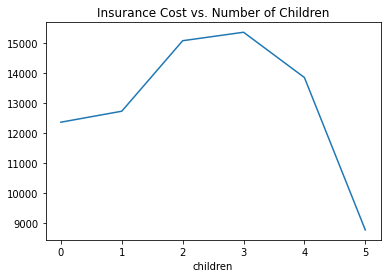

In [9]:
# Plot the data in a line graph with children as the x-axis and charges as the y-axis
average_cost_by_children.plot.line("children", "charges", title="Insurance Cost vs. Number of Children")

The Insurance Cost vs. Number of Children line graph illustrates the same information I've previously printed via function calls, but I am more easily able to discern it with the line graph!

I still want to know the exact average costs, so to conclude part two, I will print the average insurance cost for patients based on the number of children they have.

In [10]:
count = 0

for number_of_children in range(6): # Iterate through the possible values of children and print how much patients pay for insurance on average based on how many children they have
    
    if number_of_children == 1: # The singular form of children is child
        print("On average, patients with 1 child pay ${} for insurance.".format(round(average_cost_by_children[1], 2)))
    
    else: # The plural form of child is children
        print("On average, patients with {} children pay ${} for insurance.".format(count, round(average_cost_by_children[number_of_children], 2)))

    count += 1 # Increment count for the next iteration

On average, patients with 0 children pay $12365.98 for insurance.
On average, patients with 1 child pay $12731.17 for insurance.
On average, patients with 2 children pay $15073.56 for insurance.
On average, patients with 3 children pay $15355.32 for insurance.
On average, patients with 4 children pay $13850.66 for insurance.
On average, patients with 5 children pay $8786.04 for insurance.


# Part Three: Sex by Age Group

Part three examines which sex pays more for insurance by age group. According to the summary statistics in part one, the youngest and oldest ages are 18 and 65. I will create a dictionary that contains values of all possible ages. The keys will be the name of the age groups (e.g. teens, twenties, thirties), and the values will be a list of their corresponding ages.

In [11]:
age_groups = {
    "teens": [18, 19],
    "twenties": list(range(20, 30)), # the value of "twenties" is [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
    "thirties": list(range(30, 40)),
    "forties": list(range(40, 50)),
    "fifties": list(range(50, 60)),
    "sixties": list(range(60, 76))
    }

Now, I will create a function that will calculate the difference of insurance costs between males and females overall and by age group.

In [12]:
def calculate_difference_by_sex(age_group=None): # Argument is optional and the default value of age_group is None

    if age_group == None:
        
        female_average_cost = df[df["sex"] == "female"]["charges"].mean() # Calculate the average insurance cost for females
        male_average_cost = df[df["sex"] == "male"]["charges"].mean() # and then for males

        print("On average, males pay more than females by ${}.".format(round(male_average_cost - female_average_cost, 2))) # Print the difference in a string

    else: # Calculate the average insurance cost for females and males by the given age group and print the difference in a string

        female_average_cost = df[(df["sex"] == "female") & (df["age"] >= age_groups[age_group][0]) & (df["age"] <= age_groups[age_group][-1])]["charges"].mean()
        male_average_cost = df[(df["sex"] == "male") & (df["age"] >= age_groups[age_group][0]) & (df["age"] <= age_groups[age_group][-1])]["charges"].mean()

        print("On average, males in their {} pay more than females by ${}.".format(age_group, round(male_average_cost - female_average_cost, 2)))

Let's call the calculate_difference_by_sex() function!

In [13]:
calculate_difference_by_sex()
calculate_difference_by_sex("teens")
calculate_difference_by_sex("twenties")
calculate_difference_by_sex("thirties")
calculate_difference_by_sex("forties")
calculate_difference_by_sex("fifties")
calculate_difference_by_sex("sixties")

On average, males pay more than females by $1387.17.
On average, males in their teens pay more than females by $656.67.
On average, males in their twenties pay more than females by $1467.97.
On average, males in their thirties pay more than females by $2595.64.
On average, males in their forties pay more than females by $980.8.
On average, males in their fifties pay more than females by $1448.93.
On average, males in their sixties pay more than females by $1783.32.


In conclusion, males tend to pay more for insurance than females across all age groups.

# Part Four: The Most Influential Factor in Insurance Costs

In part four, I will create data visualizations to examine the relationship between insurance cost and variables I have not yet explored. I will then hypothesize which variable is the most influential factor in insurance costs. To begin, I will create an Insurance Cost vs. BMI scatter plot.

<AxesSubplot:title={'center':'Insurance Cost vs. BMI'}, xlabel='bmi', ylabel='charges'>

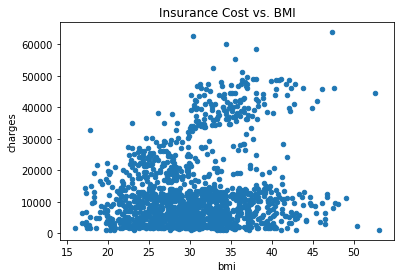

In [14]:
df.plot.scatter("bmi", "charges", title="Insurance Cost vs. BMI")

It seems like there is a positive—albeit slight—correlation between insurance cost and BMI. 

Next, I will create an Insurance Cost vs. Age scatter plot. (Recall that in part three, I determined which sex pays more for insurance by age group, but I did not analyze the relationship between insurance cost and age itself.)

<AxesSubplot:title={'center':'Insurance Cost vs. Age'}, xlabel='age', ylabel='charges'>

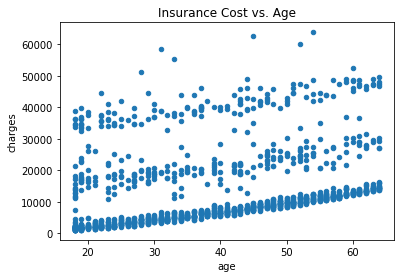

In [15]:
df.plot.scatter("age", "charges", title="Insurance Cost vs. Age")

Based on the Insurance Cost vs. Age scatter plot, I can confidently say insurance cost and age are positively correlated. However, the scatter plot illustrates even more interesting information: there are three distinct regions in which points are concentrated. I am curious as to what causes these regions, so I will choose an additional variable to explore. Back in part one, I discovered that the insurance cost difference between smokers and non-smokers is quite large, so I will be blocking the data points by the smoker variable.

<AxesSubplot:title={'center':'Non-smokers: Insurance Cost vs. Age'}, xlabel='age', ylabel='charges'>

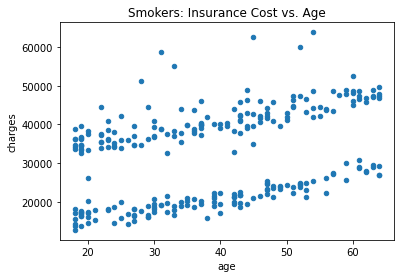

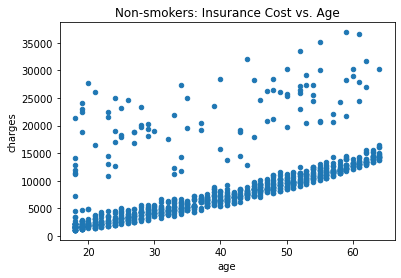

In [16]:
df_smokers = df[df["smoker"] == "yes"] # Create a DataFrame with only smokers
df_smokers.plot.scatter("age", "charges", title="Smokers: Insurance Cost vs. Age") # Create a scatter plot of charges vs. age that only displays smokers

df_nonsmokers = df[df["smoker"] == "no"] # Create a DataFrame with only non-smokers
df_nonsmokers.plot.scatter("age", "charges", title="Non-smokers: Insurance Cost vs. Age") # Create a scatter plot of charges vs. age that only displays non-smokers

It seems like I chose the right variable! According to these two scatter plots, the region closest to the y-axis—or the least expensive region—in the original Insurance Cost vs. Age scatter plot is primarily comprised of non-smokers, whereas the more expensive regions are primarily comprised of smokers. This means that smokers tend to pay more than non-smokers by age as well.

Based on my analysis, I predict smoker to be the most influential factor in insurance costs. Let's test my hypothesis by backtracking to my Insurance Cost vs. BMI scatter plot and blocking the data points by smoker.

<AxesSubplot:title={'center':'Non-smokers: Insurance Cost vs. BMI'}, xlabel='bmi', ylabel='charges'>

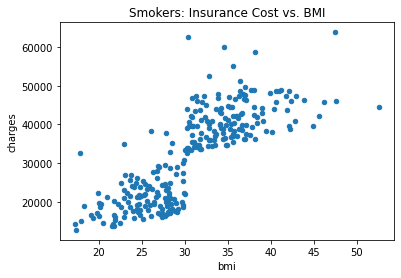

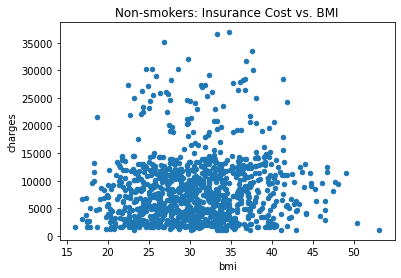

In [17]:
df_smokers.plot.scatter("bmi", "charges", title="Smokers: Insurance Cost vs. BMI") # Create a scatter plot of charges vs. bmi that only displays smokers

df_nonsmokers.plot.scatter("bmi", "charges", title="Non-smokers: Insurance Cost vs. BMI") # Create a scatter plot of charges vs. bmi that only displays non-smokers

It seems like smokers are responsible for the correlation between BMI and insurance cost. On the contrary, there doesn't seem to be a correlation between BMI and insurance cost among non-smokers.

Additionally, non-smokers concentrate closest to the y-axis in the original Insurance Cost vs. BMI scatter plot, whereas smokers concentrate the farthest. The different scales of each scatter plot (including the original) emphasize this.

So far, my analysis has supported my hypothesis: smoker is the most influential factor in insurance costs. To conclude part four, I will calculate the standard deviation of average charges for all variables (except charges). If the standard deviation of average charges by smoker is the highest, I can confidently stand by my hypothesis. This is because standard deviation is a measurement of how dispersed a set of data points is. The larger the standard deviation, the bigger the effect on insurance costs. 

In [18]:
highest_std = 0

try:
    for column in df.columns: # Iterate through df columns
        std = df.groupby(column).agg("mean")["charges"].std() # Calculate the standard deviation of average charges by column
        if std > highest_std: 
            highest_std = std # Store the maximum standard deviation

except: # Account for when column = "charges"
    pass
    
if highest_std == df.groupby("smoker").agg("mean")["charges"].std(): # Check if the standard deviation of average charges by smoker is highest
    print("Smoker seems to be the most influential factor in insurance costs!")

else: # If not, correct my hypothesis
    print("Actually, {} seems to be the most influential factor in insurance costs.".format(column))

Smoker seems to be the most influential factor in insurance costs!


# Conclusion

Based on my analysis, I can conclude the following:

1. Smokers tend to pay much more for insurance than non-smokers across all regions. Overall, they pay an average of $23,615.96 more.
2. The average insurance cost initially increases as the number of children patients have increases, but it decreases once patients have more than 3 children.
3. Males tend to pay more for insurance than females across all age groups. Overall, they pay an average of $1,387.17 more.
4. Smoking seems to be the most influential factor in insurance costs.